In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!mkdir "/content/COVID_Xray/"

In [ ]:
!unzip "/content/drive/My Drive/COVID/Dataset/train.zip" -d /content/COVID_Xray/

Archive:  /content/drive/My Drive/COVID/Dataset/train.zip
   creating: /content/COVID_Xray/train/Covid/
  inflating: /content/COVID_Xray/train/Covid/Covid_1.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_10.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_100.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_101.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_102.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_103.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_104.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_105.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_106.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_107.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_108.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_109.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_11.png  
  inflating: /content/COVID_Xray/train/Covid/Covid_110.png  
  inflating: /content/COVID_Xray/train/Covid/C

In [ ]:
!unzip "/content/drive/My Drive/COVID/Dataset/test.zip" -d /content/COVID_Xray/

Archive:  /content/drive/My Drive/COVID/Dataset/test.zip
   creating: /content/COVID_Xray/test/Covid/
  inflating: /content/COVID_Xray/test/Covid/Covid_709.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_710.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_711.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_712.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_713.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_714.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_715.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_716.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_717.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_718.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_719.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_720.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_721.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_722.png  
  inflating: /content/COVID_Xray/test/Covid/Covid_723.png 

In [ ]:
import os
from os.path import basename, join, exists

In [ ]:
os.chdir(r"/content/COVID_Xray/")

In [ ]:
ls

test/  train/


In [ ]:
train_dir="train/"
test_dir="test/"

total=0
print('---Training set details----')
for sub_folder in os.listdir(train_dir):
  no_of_images=len(os.listdir(train_dir + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of Chest Xray training images=",total)

---Training set details----
1599 Normal images
712 Covid images
1544 Pneumonia images
Total no. of Chest Xray training images= 3855


In [ ]:
total=0
print('---Test set details----')
for sub_folder in os.listdir(test_dir):
  no_of_images=len(os.listdir(test_dir + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of Chest Xray test images=",total)

---Test set details----
40 Normal images
40 Covid images
40 Pneumonia images
Total no. of Chest Xray test images= 120


In [ ]:
!mkdir "/content/COVID_Xray/extracted_features/"

In [ ]:
extracted_features_dir="/content/COVID_Xray/extracted_features/"

In [ ]:
import numpy as np
np.random.seed(777)
import time
import keras as keras
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,LSTM
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
# DCNN Models used
#---------------------------------------------
from keras.applications.vgg16 import VGG16
#----------------------------------------------
from keras.applications.vgg16 import preprocess_input as pi_vgg16
from keras.models import load_model
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from  numpy import mean 
from numpy import std
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, Concatenate
from keras.layers import BatchNormalization,Dropout
from keras.layers import Lambda
from keras.regularizers import l2
import math
from keras import backend as K
from keras.metrics import categorical_accuracy
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from keras.models import load_model

In [ ]:
img_height =512
img_width =512
batch_size =32
input_shape = (img_width, img_height, 3)

In [ ]:
print("-----------------Image Augmentation for VGG16--------------")

random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    preprocessing_function=pi_vgg16,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split= 0.2,
    zoom_range=0.1,
    shear_range=0.2)

train_generator_vgg16 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='categorical')

val_generator_vgg16 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='categorical')

test_datagen=ImageDataGenerator(preprocessing_function=pi_vgg16)
test_generator_vgg16=test_datagen.flow_from_directory(test_dir,
                                                      target_size=(img_height, img_width),
                                                          batch_size=batch_size, 
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='categorical') 



-----------------Image Augmentation for VGG16--------------
Found 3086 images belonging to 3 classes.
Found 769 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:

nb_train_samples = len(train_generator_vgg16.filenames)
nb_validation_samples = len(val_generator_vgg16.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator_vgg16.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))
print(nb_train_samples)
print(nb_validation_samples)
print(nb_test_samples)
print(predict_size_train)
print(predict_size_validation)
print(predict_size_test)

3086
769
120
97
25
4


In [ ]:
model_name="VGG16"
model = VGG16(include_top=False, weights="imagenet",pooling='avg',input_shape=input_shape)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d


In [ ]:
image_input =model.input

x1= GlobalAveragePooling2D()(model.get_layer("block2_conv2").output)
#x2= GlobalAveragePooling2D()(model.get_layer("block3_conv3").output)
x3 = GlobalAveragePooling2D()(model.get_layer("block4_conv3").output)  
x4 = GlobalAveragePooling2D()(model.get_layer("block5_conv3").output)  
out= Concatenate()([x1,x3,x4])
custom_vgg16_model = Model(image_input , out)
custom_vgg16_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 256, 256, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [ ]:
for i, layer in enumerate(custom_vgg16_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 global_average_pooling2d_1
19 global_average_pooling2d_2
20 global_average_pooling2d_3
21 concatenate


In [ ]:
for layer in custom_vgg16_model.layers[:17]:
    layer.trainable = False
custom_vgg16_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 256, 256, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [ ]:
#Saving features of the training images
bottleneck_features_train = custom_vgg16_model.predict_generator(train_generator_vgg16, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [ ]:
# Saving features of the validation images
bottleneck_features_validation = custom_vgg16_model.predict_generator(val_generator_vgg16, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

In [ ]:
# Saving features of the test images
bottleneck_features_test = custom_vgg16_model.predict_generator(test_generator_vgg16, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [ ]:
train_data=np.load(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy')
validation_data=np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy')
test_data=np.load(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy')

In [ ]:
train_data=np.load('/content/drive/My Drive/COVID/Feature Extraction/VGG16/VGG16_train_features.npy')
validation_data=np.load('/content/drive/My Drive/COVID/Feature Extraction/VGG16/VGG16_val_features.npy')
test_data=np.load('/content/drive/My Drive/COVID/Feature Extraction/VGG16/VGG16_test_features.npy')

In [ ]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(3086, 1152)
(769, 1152)
(120, 1152)


In [ ]:
train_labels=train_generator_vgg16.classes
train_labels=train_labels = keras.utils.to_categorical(train_labels, num_classes=3)
validation_labels=val_generator_vgg16.classes
validation_labels = keras.utils.to_categorical(validation_labels, num_classes=3)
test_labels=test_generator_vgg16.classes
test_labels=keras.utils.to_categorical(test_labels,num_classes=3)

In [ ]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(3086, 3)
(769, 3)
(120, 3)


In [ ]:

model = Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax',name= 'output'))

adam_opt=Adam(lr = 0.001, beta_1=0.6, beta_2=0.8,amsgrad=True)

model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)


Epoch 1/1000
97/97 - 1s - loss: 15.2818 - accuracy: 0.6137 - val_loss: 1.4700 - val_accuracy: 0.8244
Epoch 2/1000
97/97 - 0s - loss: 1.2333 - accuracy: 0.7654 - val_loss: 0.5443 - val_accuracy: 0.8270
Epoch 3/1000
97/97 - 0s - loss: 0.6883 - accuracy: 0.7848 - val_loss: 0.5106 - val_accuracy: 0.8114
Epoch 4/1000
97/97 - 0s - loss: 0.5654 - accuracy: 0.8030 - val_loss: 0.4807 - val_accuracy: 0.8322
Epoch 5/1000
97/97 - 0s - loss: 0.5557 - accuracy: 0.7981 - val_loss: 0.4178 - val_accuracy: 0.8427
Epoch 6/1000
97/97 - 0s - loss: 0.5180 - accuracy: 0.8117 - val_loss: 0.4309 - val_accuracy: 0.8531
Epoch 7/1000
97/97 - 0s - loss: 0.4718 - accuracy: 0.8276 - val_loss: 0.4414 - val_accuracy: 0.8401
Epoch 8/1000
97/97 - 0s - loss: 0.4663 - accuracy: 0.8283 - val_loss: 0.4278 - val_accuracy: 0.8375
Epoch 9/1000
97/97 - 0s - loss: 0.4373 - accuracy: 0.8318 - val_loss: 0.4010 - val_accuracy: 0.8479
Epoch 10/1000
97/97 - 0s - loss: 0.4127 - accuracy: 0.8428 - val_loss: 0.3633 - val_accuracy: 0.866

In [ ]:
preds = model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Validation Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Validation Accuracy=0.9245773732119635


In [ ]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
#cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Test Accuracy=0.95


In [ ]:
model.save('/content/drive/My Drive/COVID/saved models/VGG16/covid_vgg16_input_dim_{}_fine_tuning_{}.h5'.format(512,17))
model.save_weights('/content/drive/My Drive/COVID/saved models/VGG16/covid_vgg16_input_dim_{}_fine_tuning_{}_weights.h5'.format(512,17))

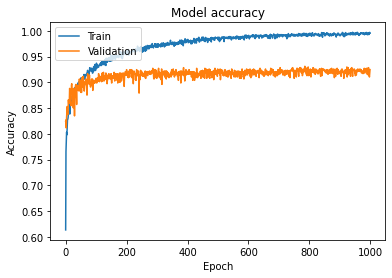

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

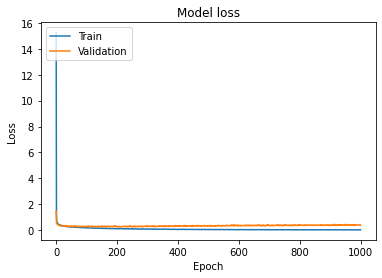

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
loaded_model=load_model('/content/drive/MyDrive/COVID/saved models/VGG16/covid_vgg16_input_dim_512_fine_tuning_17.h5',compile=False)
loaded_model.load_weights('/content/drive/My Drive/COVID/saved models/VGG16/covid_vgg16_input_dim_512_fine_tuning_17_weights.h5')

In [ ]:
training_data=np.load('/content/drive/My Drive/COVID/Feature Extraction/VGG16/VGG16_train_features.npy')
validation_data=np.load('/content/drive/My Drive/COVID/Feature Extraction/VGG16/VGG16_val_features.npy')
test_data=np.load('/content/drive/My Drive/COVID/Feature Extraction/VGG16/VGG16_test_features.npy')

In [ ]:
train_labels=train_generator_vgg16.classes
train_labels= keras.utils.to_categorical(train_labels, num_classes=3)
validation_labels=val_generator_vgg16.classes
validation_labels = keras.utils.to_categorical(validation_labels, num_classes=3)
test_labels=test_generator_vgg16.classes
test_labels=keras.utils.to_categorical(test_labels,num_classes=3)

In [ ]:
preds = loaded_model.predict(training_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in train_labels]
print('Validation Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Validation Accuracy=1.0


In [ ]:
import pandas as pd
train_df=pd.DataFrame({'True Label':y_true,'vgg16':predictions})
train_df

,True Label,vgg16
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3081,2,2
3082,2,2
3083,2,2
3084,2,2


In [ ]:
train_df.to_csv('/content/drive/My Drive/COVID/Train_Prediction_matrix.csv')

In [ ]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Validation Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Validation Accuracy=0.9245773732119635


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import pandas as pd

In [ ]:
preds = loaded_model.predict(test_data)

y_pred = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)

print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=y_pred)))

Test Accuracy=0.95


In [ ]:
for i in y_true:
  print(i,end=",")

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,

CONFUSION MATRIX


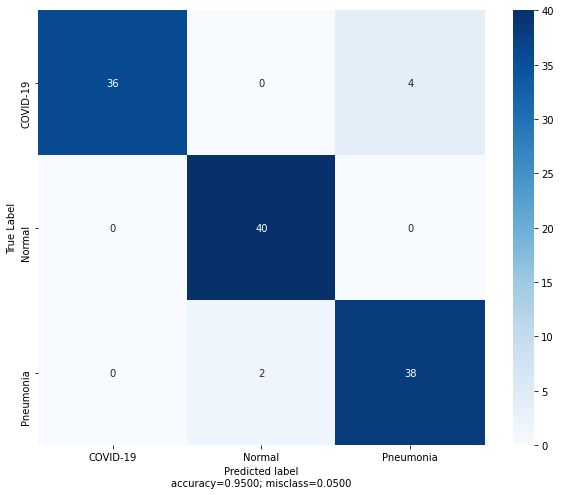

The details for confusion matrix is =
              precision    recall  f1-score   support

    COVID-19       1.00      0.90      0.95        40
      Normal       0.95      1.00      0.98        40
   Pneumonia       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['COVID-19','Normal','Pneumonia'],  
                           index =['COVID-19','Normal','Pneumonia']) 

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show() 

target_names=['COVID-19','Normal','Pneumonia']
print('The details for confusion matrix is =') 
print (classification_report(y_true, y_pred,target_names=target_names))

In [ ]:
import pandas as pd

In [ ]:
conf_score=loaded_model.predict(test_data)
y_true = [i.argmax() for i in test_labels]
conf_score

array([[9.99765933e-01, 1.61808570e-11, 2.34081133e-04],
       [1.00000000e+00, 3.33601428e-15, 3.45913120e-09],
       [1.00000000e+00, 4.01337932e-14, 3.26076752e-12],
       [9.98677433e-01, 1.85916724e-06, 1.32063415e-03],
       [4.09680635e-01, 3.65121439e-02, 5.53807259e-01],
       [9.99952078e-01, 1.37029274e-05, 3.42028507e-05],
       [9.99413967e-01, 4.57208604e-04, 1.28790838e-04],
       [1.00000000e+00, 2.18279034e-10, 3.81695315e-08],
       [1.00000000e+00, 7.42297853e-17, 7.18826474e-12],
       [9.99766886e-01, 9.73410588e-12, 2.33131635e-04],
       [8.72611880e-01, 1.27168700e-01, 2.19494483e-04],
       [9.98612046e-01, 1.09959965e-10, 1.38798577e-03],
       [9.97908115e-01, 3.40434845e-08, 2.09190929e-03],
       [8.48120078e-03, 7.27758110e-02, 9.18743014e-01],
       [9.67222571e-01, 3.26408818e-02, 1.36524119e-04],
       [9.99999881e-01, 1.79334832e-13, 1.78039585e-07],
       [9.99959946e-01, 8.72990753e-13, 4.00991667e-05],
       [9.99991894e-01, 1.63229

In [ ]:
test_df=pd.DataFrame({'True Label':y_true,'vgg16_class0':conf_score[:,0],'vgg16_class1':conf_score[:,1],'vgg16_class2':conf_score[:,2]})
test_df

,True Label,vgg16_class0,vgg16_class1,vgg16_class2
0,0,9.997659e-01,1.618086e-11,2.340811e-04
1,0,1.000000e+00,3.336014e-15,3.459131e-09
2,0,1.000000e+00,4.013379e-14,3.260768e-12
3,0,9.986774e-01,1.859167e-06,1.320634e-03
4,0,4.096806e-01,3.651214e-02,5.538073e-01
...,...,...,...,...
115,2,5.289370e-13,1.708974e-02,9.829102e-01
116,2,4.523590e-13,1.193429e-02,9.880657e-01
117,2,1.754031e-13,9.999989e-01,1.128248e-06
118,2,3.275368e-11,5.605959e-06,9.999944e-01


In [ ]:
test_df.to_csv('/content/drive/MyDrive/COVID/Confidence_matrix.csv')

Prediction Matrix

In [ ]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

In [ ]:
val_df=pd.DataFrame({'True Label':y_true,'vgg16':predictions})
val_df

,True Label,vgg16
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
764,2,2
765,2,2
766,2,2
767,2,2


In [ ]:
val_df.to_csv('/content/drive/My Drive/COVID/Val_Prediction_matrix.csv')

In [ ]:
preds = loaded_model.predict(test_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]

test_df=pd.DataFrame({'True Label':y_true,'vgg16':predictions})
test_df

,True Label,vgg16
0,0,0
1,0,0
2,0,0
3,0,0
4,0,2
...,...,...
115,2,2
116,2,2
117,2,1
118,2,2


In [ ]:
test_df.to_csv('/content/drive/My Drive/COVID/Test_Prediction_matrix.csv')

In [ ]:
y_pred1=[0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2]
y_true=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
y_pred2=[2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2]
y_pred3=[0,0,0,2,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2]
y_pred_ensemble=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

CONFUSION MATRIX


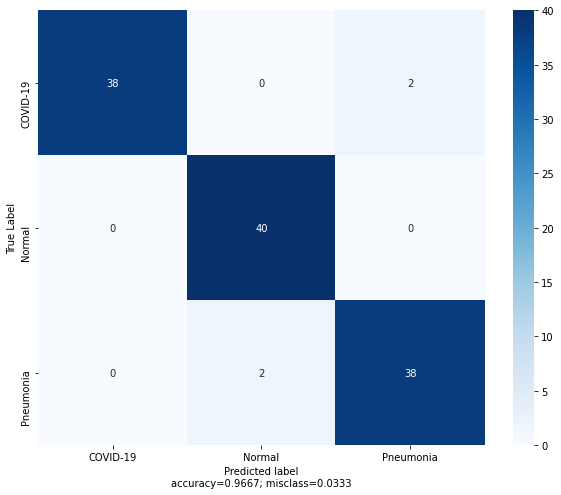

The details for confusion matrix is =
              precision    recall  f1-score   support

    COVID-19       1.00      0.95      0.97        40
      Normal       0.95      1.00      0.98        40
   Pneumonia       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



<Figure size 432x288 with 0 Axes>

In [ ]:
print('CONFUSION MATRIX')
cm = confusion_matrix(y_pred=y_pred_ensemble, y_true=y_true)
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['COVID-19','Normal','Pneumonia'],  
                           index =['COVID-19','Normal','Pneumonia']) 

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show() 

target_names=['COVID-19','Normal','Pneumonia']
print('The details for confusion matrix is =') 
print (classification_report(y_true, y_pred_ensemble,target_names=target_names))
plt.savefig('/content/drive/MyDrive/COVID/Confusion matrix.png')

In [ ]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y_test = label_binarize(y_true, classes=[0, 1, 2])
n_classes = Y_test.shape[1]
Y_pred1=label_binarize(y_pred1, classes=[0, 1, 2])
Y_pred2=label_binarize(y_pred2, classes=[0, 1, 2])
Y_pred3=label_binarize(y_pred3, classes=[0, 1, 2])
Y_pred_ensemble=label_binarize(y_pred_ensemble, classes=[0, 1, 2])

Average precision score, micro-averaged over all classes: 0.95


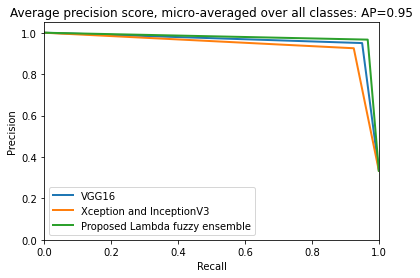

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# For each class
precision1= dict()
recall1= dict()
precision2= dict()
recall2= dict()
precision3= dict()
recall3= dict()
precision4= dict()
recall4= dict()
average_precision = dict()
plt.figure()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
for i in range(n_classes):
  precision1[i], recall1[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_pred1[:, i])
  precision1["micro"], recall1["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_pred1.ravel())
plt.plot(recall1["micro"], precision1["micro"], lw=2, label='VGG16')
for i in range(n_classes):
  precision3[i], recall3[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_pred3[:, i])
  precision3["micro"], recall3["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_pred3.ravel())
plt.plot(recall3["micro"], precision3["micro"], lw=2, label='Xception and InceptionV3')
for i in range(n_classes):
  precision4[i], recall4[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_pred_ensemble[:, i])
  precision4["micro"], recall4["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_pred_ensemble.ravel())
  average_precision["micro"] = average_precision_score(Y_test, Y_pred_ensemble,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
plt.plot(recall4["micro"], precision4["micro"], lw=2, label='Proposed Lambda fuzzy ensemble')
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))
plt.legend(loc="best")
plt.savefig('/content/drive/MyDrive/COVID/PR_curve.png')

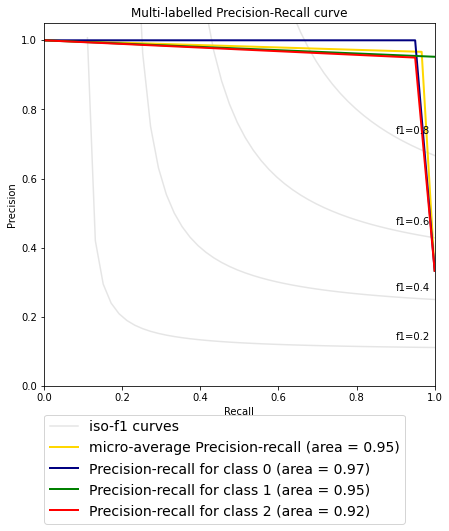

<Figure size 432x288 with 0 Axes>

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_pred_ensemble[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_pred_ensemble[:, i])
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_pred_ensemble.ravel())
average_precision["micro"] = average_precision_score(Y_test, Y_pred_ensemble,
                                                     average="micro")
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'green','red','magenta'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-labelled Precision-Recall curve')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()
plt.savefig('/content/drive/MyDrive/COVID/PR_multiclass.png')